In [16]:
import torch
from torch import optim
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

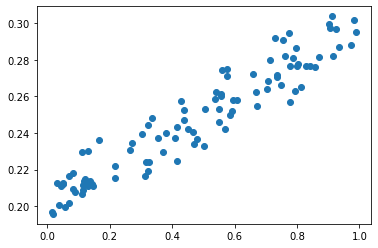

In [2]:
x_data = np.random.rand(100)
nosie = np.random.normal(0,0.01,x_data.shape)
y_data = x_data*0.1 + 0.2 + nosie
plt.scatter(x_data,y_data)
plt.show()

In [3]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)
# 转换成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)

In [5]:
# 构建神经网络模型
class Liner(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1,1)       
    def forward(self,x):
        out = self.fc(x)
        return out

In [6]:
# 定义模型
model = Liner()
# 定义代价函数
criterion = nn.MSELoss()
# 定义优化器 
optimizer = optim.SGD(model.parameters(),lr = 0.01)

In [7]:
# 查看参数值
for name, parameters in model.named_parameters():
    print('名称:{},参数值:{}'.format(name,parameters))

名称:fc.weight,参数值:Parameter containing:
tensor([[0.7814]], requires_grad=True)
名称:fc.bias,参数值:Parameter containing:
tensor([0.8875], requires_grad=True)


In [8]:
# 训练过程
for i in range(5000):
    outputs = model(x_data)
    loss = criterion(outputs,y_data)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值 
    optimizer.step()
    if i%500 == 0:
        print(i,loss.item())

0 1.063697099685669
500 0.0016319772694259882
1000 0.00047521706437692046
1500 0.00018313225882593542
2000 0.0001093799655791372
2500 9.075713023776188e-05
3000 8.605479524703696e-05
3500 8.486750448355451e-05
4000 8.45677059260197e-05
4500 8.449202141491696e-05


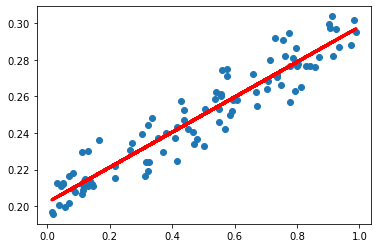

In [9]:
y_pred = model(x_data)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.detach().numpy(),'r-',lw = 3)
plt.show()

# 非线性

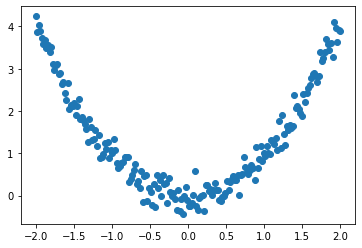

In [14]:
x_data = np.linspace(-2,2,200)
noise = np.random.normal(0,0.2,x_data.shape)
y_data = np.square(x_data) + noise
plt.scatter(x_data,y_data)
plt.show()

In [15]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)
# 转换成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)

In [18]:
# 构建神经网络模型
class Liner(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,10)
        self.fc2 = nn.Linear(10,1)
    def forward(self,x):
        out = self.fc1(x)
        out = F.tanh(out)
        out = self.fc2(out)
        return out

In [19]:
# 定义模型
model = Liner()
# 定义代价函数
criterion = nn.MSELoss()
# 定义优化器 
optimizer = optim.SGD(model.parameters(),lr = 0.01)

In [20]:
# 训练过程
for i in range(5000):
    outputs = model(x_data)
    loss = criterion(outputs,y_data)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值 
    optimizer.step()
    if i%500 == 0:
        print(i,loss.item())

D:\Python\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


0 3.0204198360443115
500 0.47676756978034973
1000 0.1366768181324005
1500 0.08673007041215897
2000 0.06869272887706757
2500 0.06004763022065163
3000 0.05527253448963165
3500 0.0523994080722332
4000 0.05056728050112724
4500 0.04934610053896904


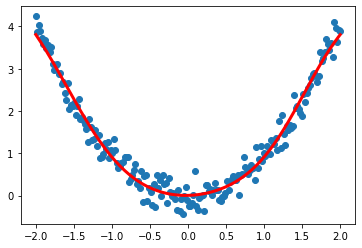

In [21]:
y_pred = model(x_data)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.detach().numpy(),'r-',lw = 3)
plt.show()